# 1.Carga de datos

In [47]:
import pandas as pd

In [48]:
df_creditos = pd.read_excel('/content/BD_creditos.xlsx')
df_creditos.head()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [49]:
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

# 2.Exploración inicial de datos

**2.1-Descripcion y caracterización de los datos**

**Variables categoricas**

Ordinal
- tendencia_ingresos

Nominales
- tipo_credito
- tipo_laboral

**Variables numericas**

Discretas
- edad
- plazo_meses
- edad_cliente
- cant_creditosvigentes
- huella_consulta
- creditos_sectorFinanciero
- creditos_sectorCooperativo
- creditos_sectorReal
- total_otros_prestamos
- Pago_atiempo

Continuas
- capital_prestado
- salario_cliente
- puntaje
- puntaje_datacredito
- saldo_mora
- saldo_total
- saldo_principal
- saldo_mora_codeudor
- promedio_ingresos_datacredito

**Dicotómicas**
- creditos_sectorCooperativo
- Pago_atiempo
- tipo_laboral

**Politómicas**
- tipo_credito
- tendencia_ingresos



Revisión de nulos

In [50]:
# Contar valores nulos por columna en df_creditos
nulos = df_creditos.isnull().sum()

# Calcular el porcentaje de nulos por columna
nulos_porcentaje = (df_creditos.isnull().mean() * 100).round(2)

# Unir en un DataFrame para mejor visualización
nulos_df = pd.DataFrame({
    "Nulos": nulos,
    "Porcentaje": nulos_porcentaje
})

# Filtrar solo las columnas con nulos y ordenar
nulos_df = nulos_df[nulos_df["Nulos"] > 0].sort_values(by="Nulos", ascending=False)

print(nulos_df)


                               Nulos  Porcentaje
tendencia_ingresos              2932       27.24
promedio_ingresos_datacredito   2930       27.22
saldo_mora_codeudor              590        5.48
saldo_principal                  405        3.76
saldo_mora                       156        1.45
saldo_total                      156        1.45
puntaje_datacredito                6        0.06


**2.2-Unificar la forma como se representan los valores Nulos.**

In [51]:
import numpy as np

# Reemplazar diferentes formas de nulos por NaN
df_creditos.replace(["", " ", "NA", "N/A", "NULL", "None", "Desconocido"], np.nan, inplace=True)

**2.3 Eliminación de variables irrelevantes**

In [52]:
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [53]:
df_creditos.describe()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,...,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,...,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,...,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000
std,2.338279,NaN,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,...,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668


In [54]:
df_creditos.saldo_mora_codeudor.value_counts()

,count
saldo_mora_codeudor,
0.0,10170
2145.0,1
30.0,1
470.0,1


                               tipo_credito  capital_prestado  plazo_meses  \
tipo_credito                       1.000000          0.017373    -0.140473   
capital_prestado                   0.017373          1.000000     0.299781   
plazo_meses                       -0.140473          0.299781     1.000000   
edad_cliente                       0.138391          0.125006    -0.085572   
salario_cliente                    0.035356          0.047038    -0.012839   
total_otros_prestamos              0.063861          0.065190    -0.013317   
cuota_pactada                      0.059193          0.764104    -0.227221   
puntaje                            0.004427         -0.043213    -0.074331   
puntaje_datacredito               -0.134522         -0.151203     0.002263   
cant_creditosvigentes              0.037340          0.050692    -0.002911   
huella_consulta                   -0.040513          0.027028     0.045767   
saldo_mora                         0.035277          0.028085   

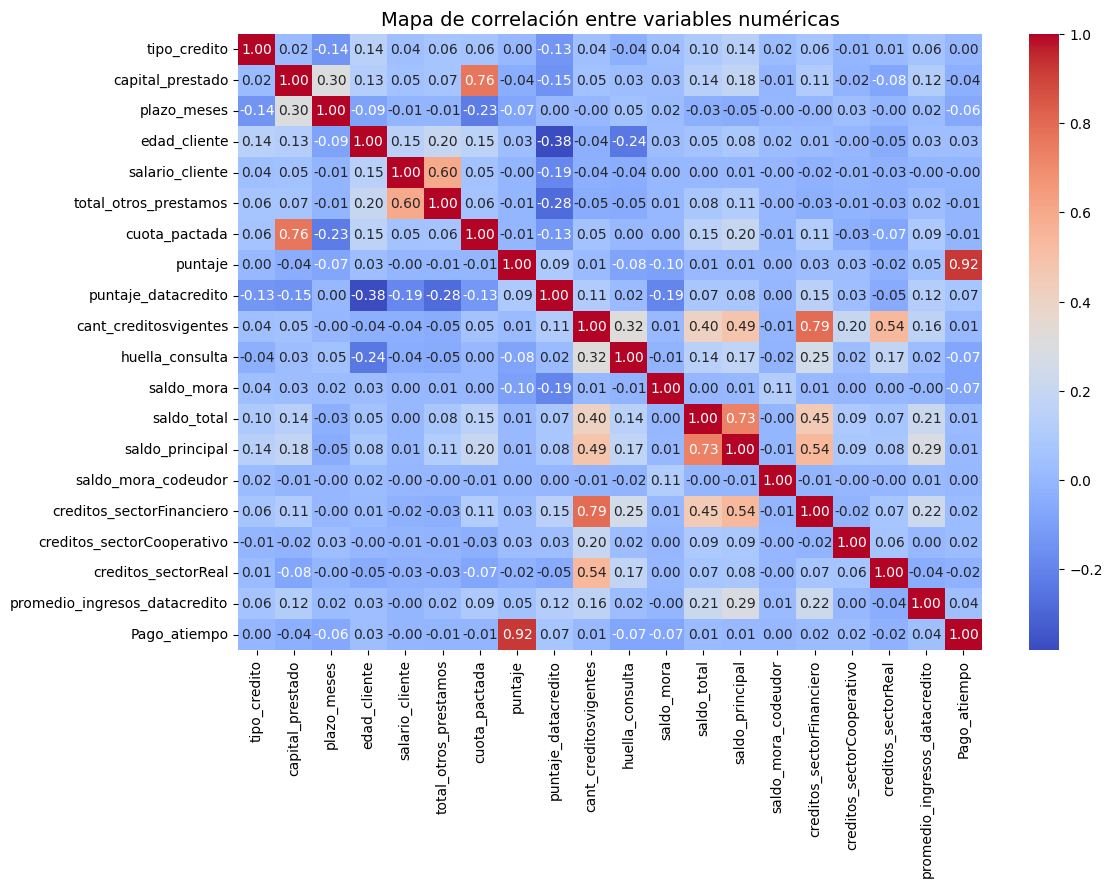

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación solo con variables numéricas
corr = df_creditos.corr(numeric_only=True)

# Mostrar la matriz en consola (opcional)
print(corr)

# Graficar el mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de correlación entre variables numéricas", fontsize=14)
plt.show()


In [56]:
df_creditos = df_creditos.drop(columns=['puntaje'])

Se elimina para evitar fuga de datos ya que existe la regla de que si el puntaje es menor a 63% se sabe que no pagó.

In [57]:
df_creditos = df_creditos.drop(columns=['saldo_mora_codeudor'])

La variable está altamente desbalanceada (casi siempre 0).

Su información es mínima para el modelo → lo más probable es que no aporte nada en el entrenamiento.

Incluso puede añadir ruido (el modelo intenta aprender de algo que ocurre en <1% de los casos).

También es duplicada de la variable saldo_mora.

In [58]:
import pandas as pd

# Variables categóricas nominales
categoricas_nominales = ["tipo_credito", "tipo_laboral"]

# Variables ordinales (si hay un orden jerárquico en tendencia_ingresos)
categoricas_ordinales = ["tendencia_ingresos"]

# Conversión a categorías
df_creditos["tipo_credito"] = df_creditos["tipo_credito"].astype("category")
df_creditos["tipo_laboral"] = df_creditos["tipo_laboral"].astype("category")
df_creditos["tendencia_ingresos"] = df_creditos["tendencia_ingresos"].astype("category")

# Numéricas continuas
continuas = ["capital_prestado", "salario_cliente", "puntaje_datacredito",
             "saldo_mora", "saldo_total", "saldo_principal",
            "promedio_ingresos_datacredito", "cuota_pactada"]

for col in continuas:
    df_creditos[col] = pd.to_numeric(df_creditos[col], errors="coerce")

# Numéricas discretas
discretas = ["edad_cliente", "plazo_meses", "cant_creditosvigentes",
             "huella_consulta", "creditos_sectorFinanciero",
             "creditos_sectorCooperativo", "creditos_sectorReal",
             "total_otros_prestamos"]

for col in discretas:
    df_creditos[col] = df_creditos[col].astype("Int64")  # Int64 soporta NaN



In [59]:
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  Int64         
 4   edad_cliente                   10763 non-null  Int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  Int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje_datacredito            10757 non-null  float64       
 10  cant_creditosvigentes          10763 non-null  Int64         
 11  huella_consulta

# 3.EDA

**3.1 Análisis univariable.**

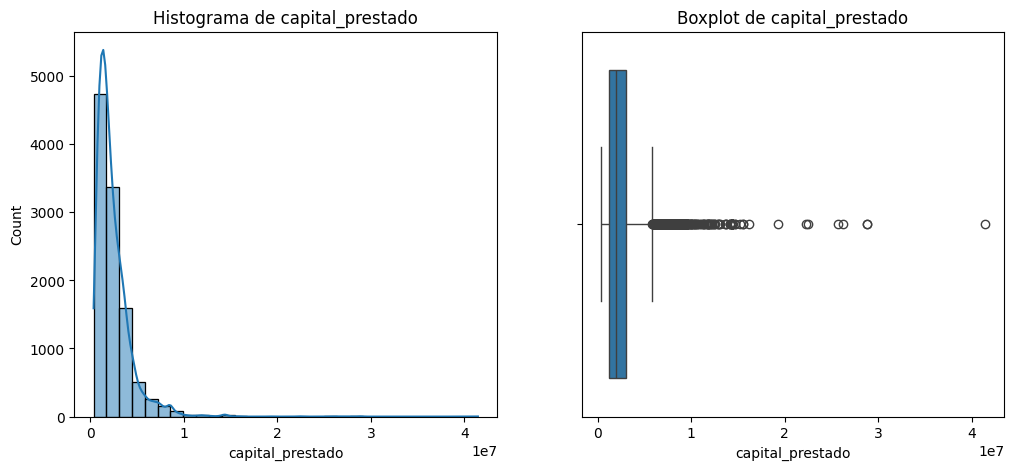

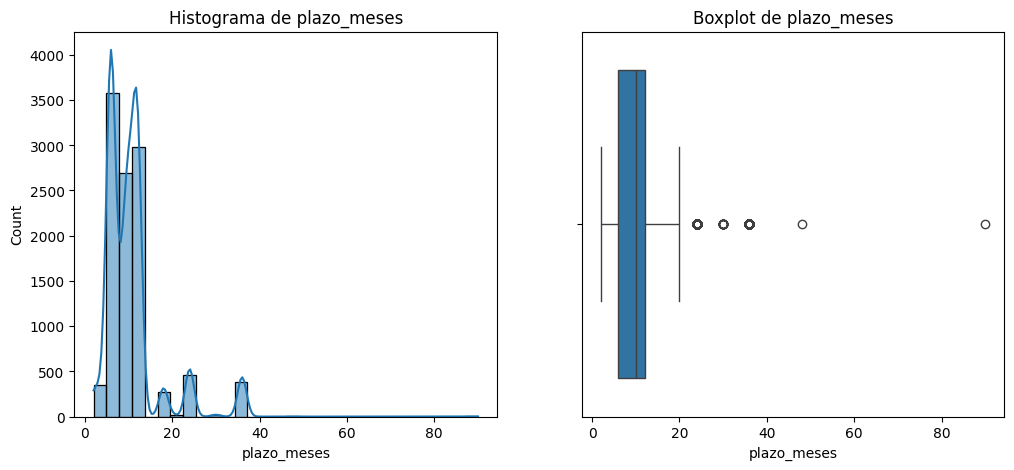

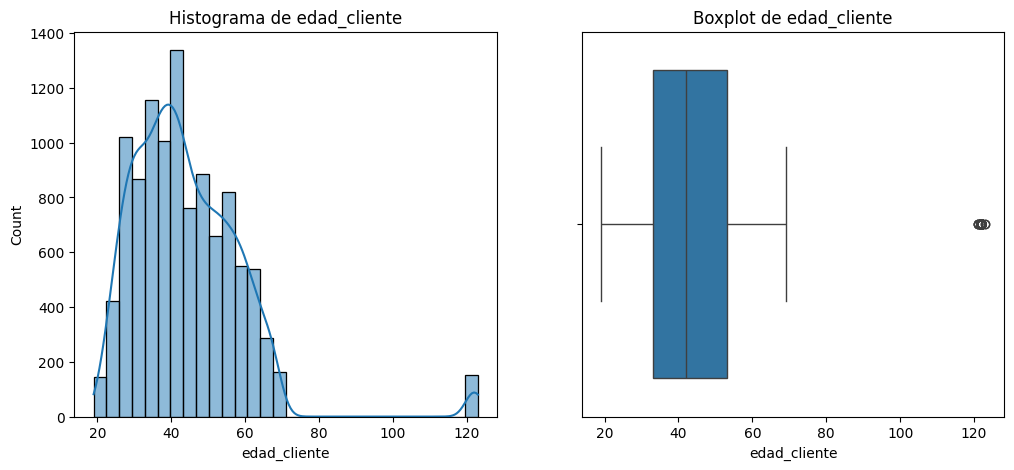

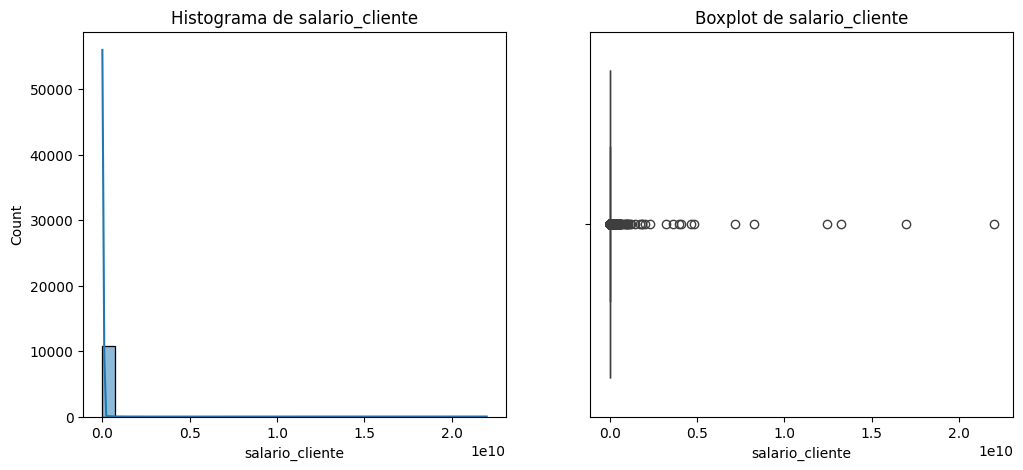

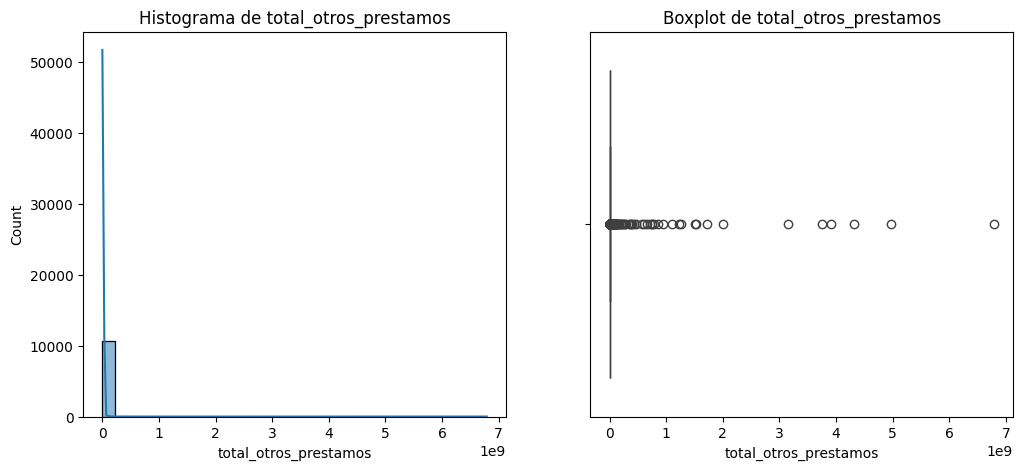

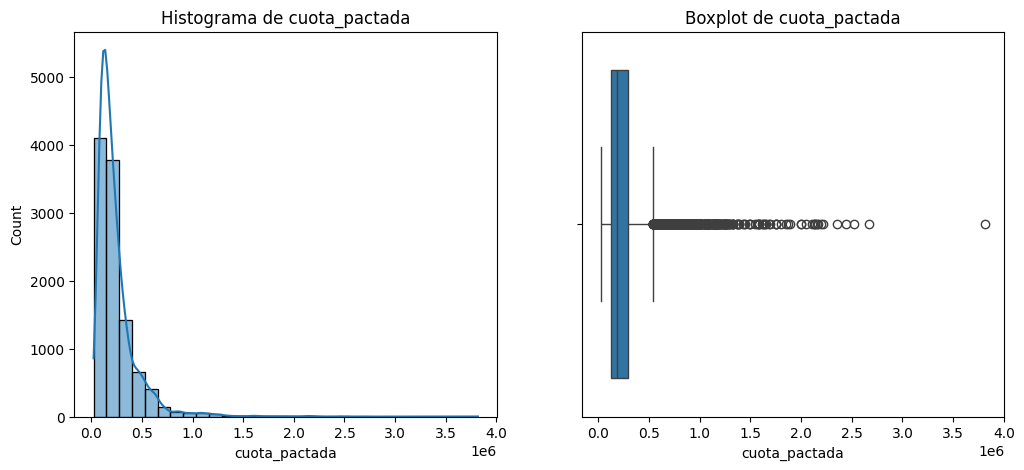

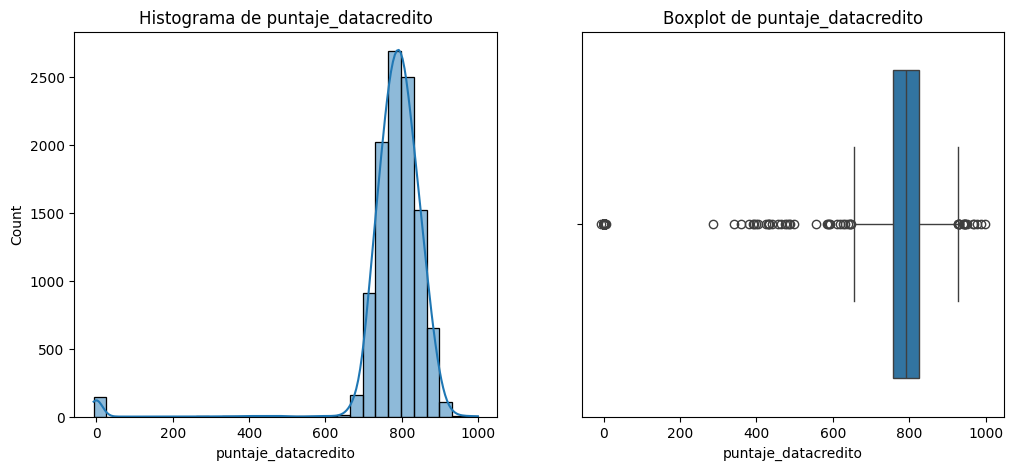

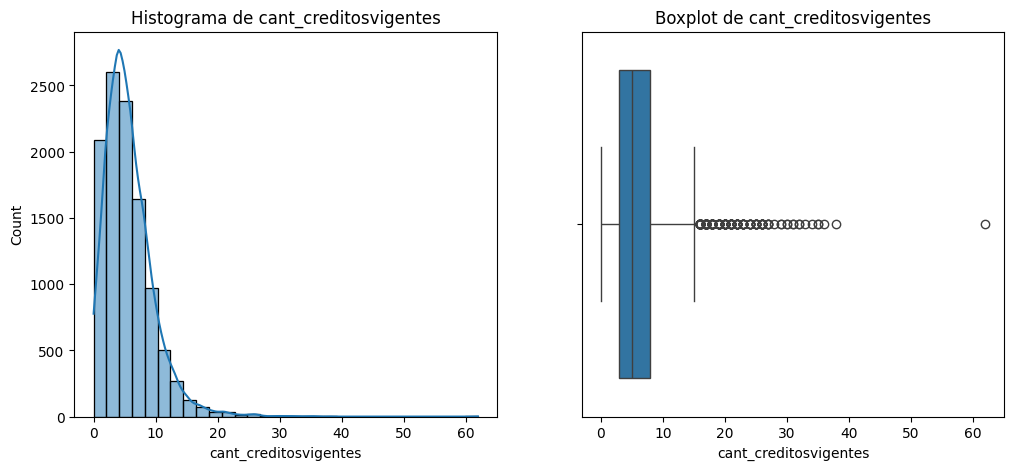

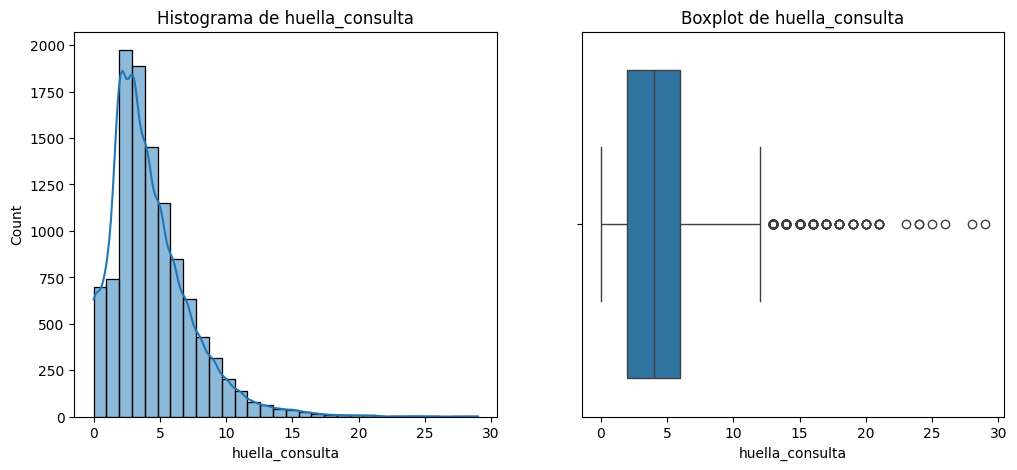

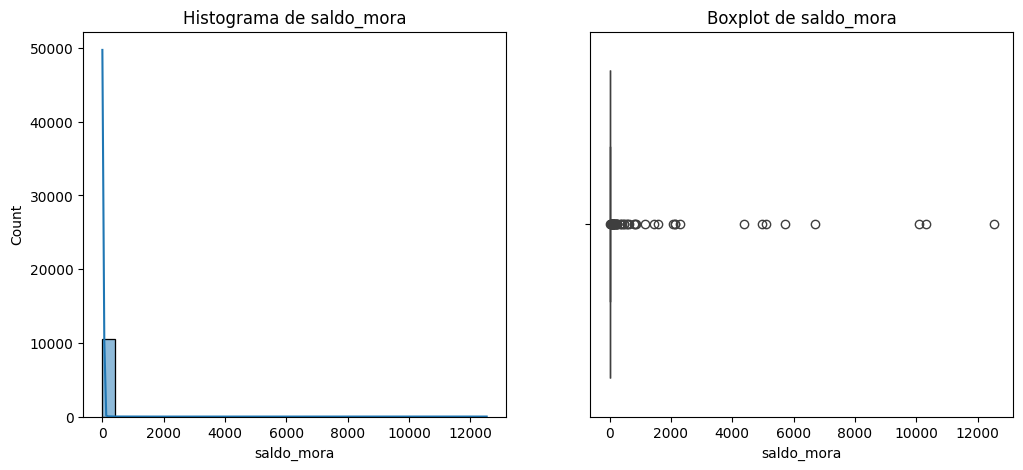

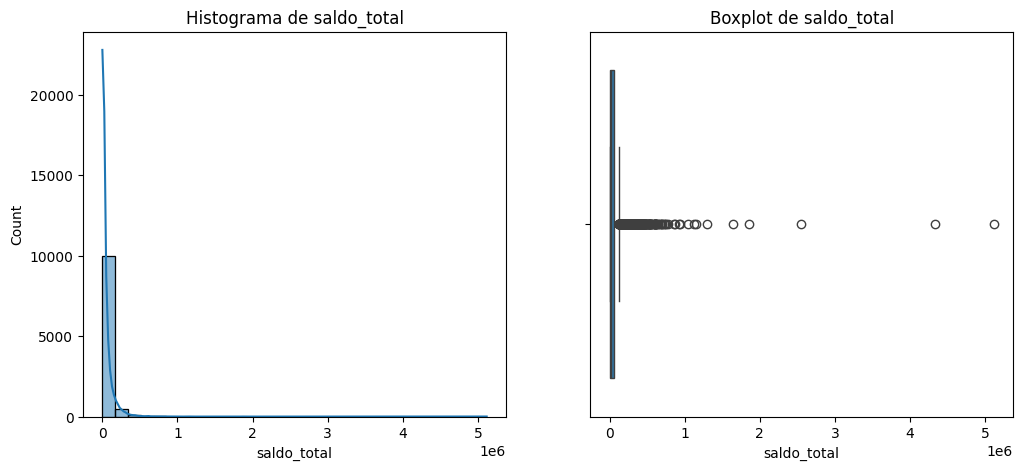

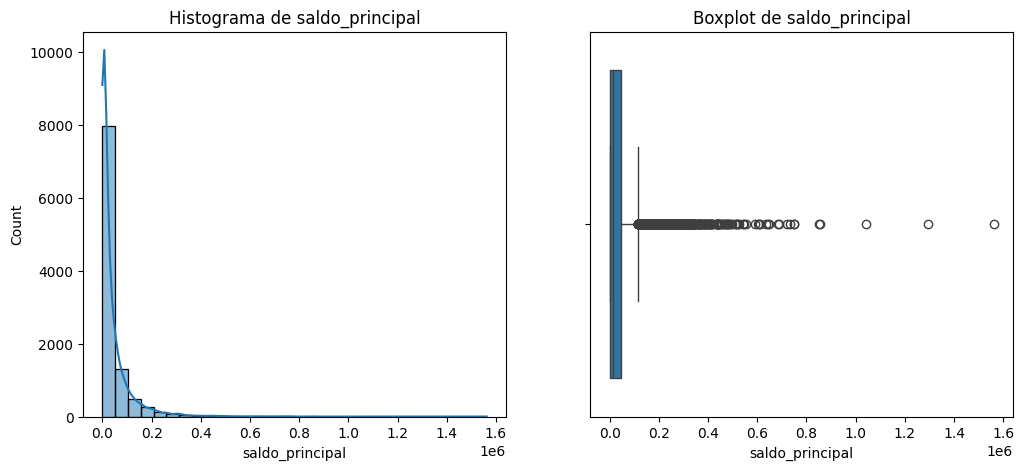

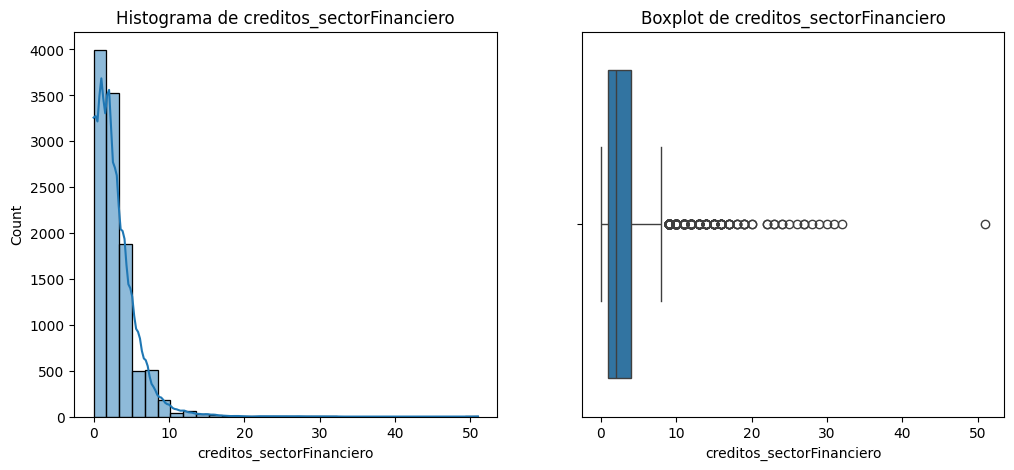

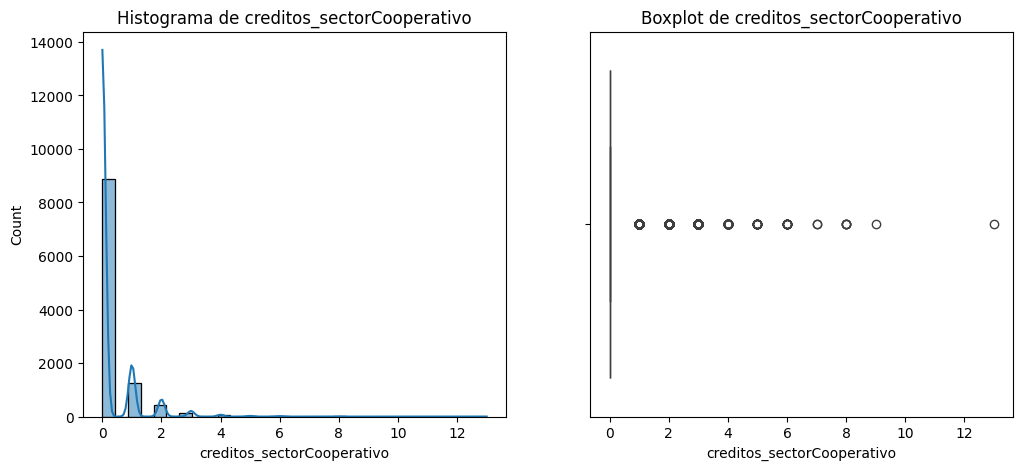

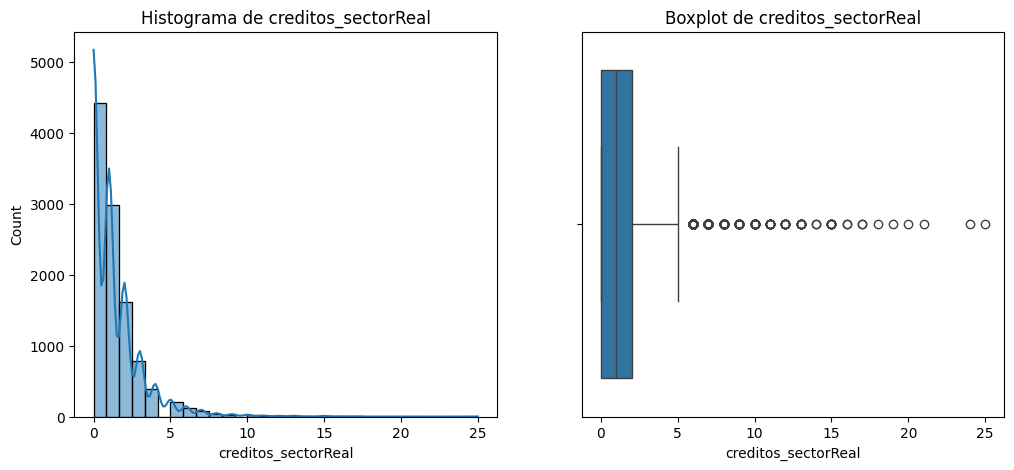

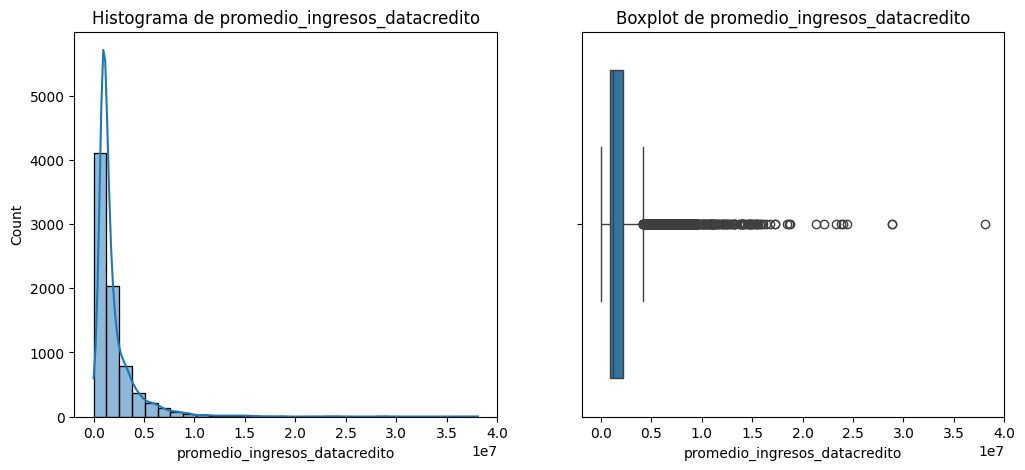

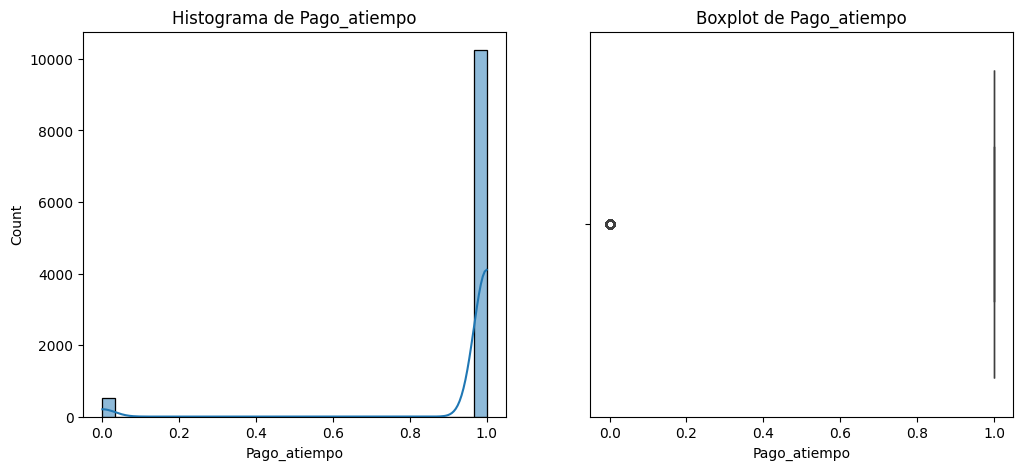

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las numéricas
numericas = df_creditos.select_dtypes(include=["int64", "float64", "Int64"]).columns

for col in numericas:
    plt.figure(figsize=(12,5))

    # Histograma con KDE
    plt.subplot(1,2,1)
    sns.histplot(df_creditos[col].dropna(), kde=True, bins=30)
    plt.title(f"Histograma de {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_creditos[col].dropna())
    plt.title(f"Boxplot de {col}")

    plt.show()


**Comprensión de características y esquema (univariable-numericas)**

* capital_prestado:
Distribución muy sesgada a la derecha; muchos valores pequeños y una cola larga con outliers.

* plazo_meses:
Picos claros entre 6 y 36 y pocos casos muy altos (≈ 84–96).

* edad_cliente:
alrededor de 35–55, con outliers extremos (≈ 100–120).
Riesgo: edades imposibles.

* salario_cliente:
Muy sesgada y con outliers gigantes (hasta 1e10). Estos outliers son normales en salario del cliente, pueden haber personas que ganas muy bien.

* total_otros_prestamos:
Casi todos bajos/cero y cola larga con grandes valores.

* cuota_pactada:
Sesgo a la derecha y outliers; guarda relación con capital y plazo.
util: cuota no debería exceder absurdamente al salario.

* puntaje_datacredito:
Concentrado ~700–850, pocos extremos muy bajos/altos.

* cant_creditosvigentes:
Sesgo a la derecha; mayoría entre 0–10, pocos extremos (hasta ~60).

* huella_consulta:
Sesgo a la derecha; mayoría baja (0–8), pocos >20.
Idea: umbrales altos suelen asociarse a mayor riesgo ya que puede haber algo extraño en el credito.

* saldo_mora:
Casi siempre 0, con algunos positivos (cola).
Útil: indicador binario “en_mora” y razón “mora/saldo_total”.

* saldo_total:
Distribución muy sesgada a la derecha; la mayoría cerca de 0 y cola larga con outliers (se ven casos hasta ~5×10^6).

* saldo_principal:
sesgo a la derecha y outliers (hasta ~1.6×10^6).
Útil para separar carga de capital vs intereses.

* creditos_sectorFinanciero:
Conteo con distribución discreta y sesgo a la derecha; mayoría 0–5, con raros >15 y extremos (~50).

* creditos_sectorCooperativo:
Muchos 0–1; pocos valores intermedios; outliers hasta ~12.

* creditos_sectorReal:
0–3 más frecuentes; cola hasta ~24.

* promedio_ingresos_datacredito
Muy sesgada con outliers fuertes (hasta ~4×10^7).
Es la referencia de ingresos de la central; contrastar con salario_cliente

* intereses (Variable derivada):
intereses = saldo_total - saldo_principal - saldo_mora.
Tiende a correlacionar con saldo_total; aporta señal de carga financiera y ayuda a entender mejor el saldo_total.

Target: Pago_atiempo (0/1). Este es el objetivo del proyecto.
Cuidado: NO usar puntaje (el que define ≥63% ⇒ paga) para modelar; fuga de información. Por esto mismo se hzio la eliminación de esta variable



* Debe cumplir saldo_principal ≤ saldo_total; si no, hay inconsistencia.
* saldo_total ≥ 0, saldo_principal ≥ 0
* intereses: calculada; intereses ≥ 0 (si <0, revisar origen).
* intereses = saldo_total - saldo_principal - saldo_mora ≥ 0 (si <0 → revisar origen).
* cant_creditosvigentes = financiero + cooperativo + real.
validar coherencia: diferencia absoluta ≤ 2–3

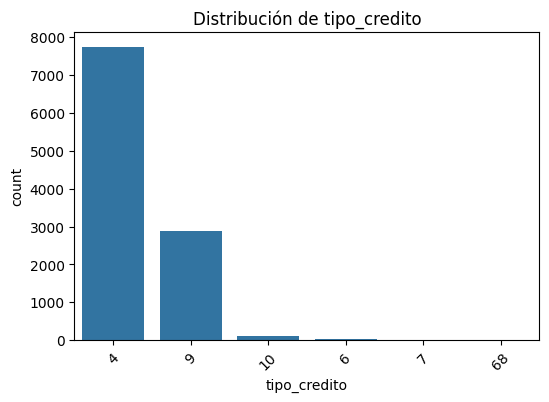


📊 Frecuencias de tipo_credito:
tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64
Proporciones relativas:
tipo_credito
4     0.719781
9     0.267212
10    0.010778
6     0.001951
7     0.000186
68    0.000093
Name: proportion, dtype: float64


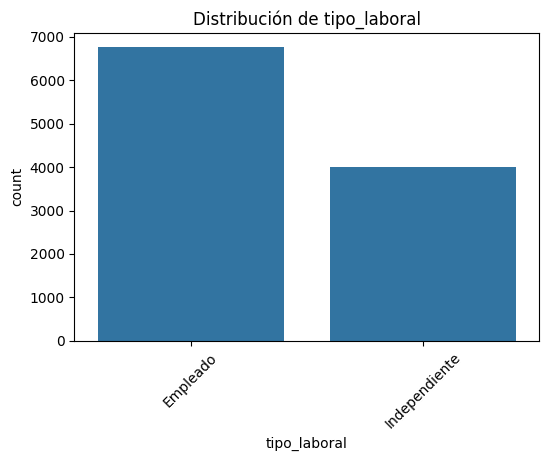


📊 Frecuencias de tipo_laboral:
tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64
Proporciones relativas:
tipo_laboral
Empleado         0.62752
Independiente    0.37248
Name: proportion, dtype: float64


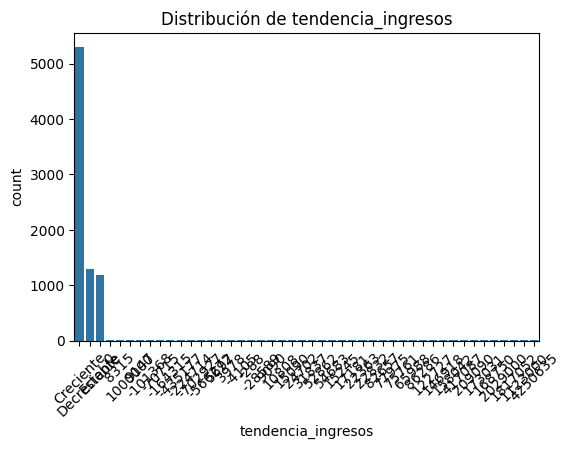


📊 Frecuencias de tendencia_ingresos:
tendencia_ingresos
Creciente      5294
Decreciente    1291
Estable        1188
0                 7
8315              6
1000000           4
9147              2
-101368           1
-70715            1
-164315           1
-435177           1
-224714           1
-702927           1
-566272           1
5697              1
3978              1
-4105             1
-288              1
-28589            1
9090              1
10808             1
15090             1
24702             1
31837             1
52862             1
54683             1
15245             1
17181             1
22363             1
22832             1
82657             1
77975             1
75761             1
65988             1
86286             1
122727            1
146918            1
158042            1
417087            1
209090            1
173031            1
168750            1
2029000           1
1817052           1
1123000           1
4250635           1
Name: count, dtype: int

In [61]:
# Seleccionamos solo las categóricas
categoricas = df_creditos.select_dtypes(include="category").columns

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_creditos[col], order=df_creditos[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n📊 Frecuencias de {col}:")
    print(df_creditos[col].value_counts())
    print("Proporciones relativas:")
    print(df_creditos[col].value_counts(normalize=True))


**Comprensión de características y esquema (univariable-categoricas)**

* tipo_credito:
El tipo de crédito 4 es el más común (7747 registros).
El tipo 9 también es frecuente (2876).
Los demás tipos (10, 6, 7, 68, 1) aparecen de manera muy marginal (<2%).

Conclusión: La mayoría de los créditos corresponden a dos tipos principales (4 y 9). Esto indica que el resto de categorías son muy poco representativas y podrían considerarse valores raros o atípicos.



* tendencia_ingresos:
Empleado: 6754 registros (62.8%).
Independiente: 4009 registros (37.2%).

Conclusión: Existe un mayor número de empleados que de independientes, pero ambos grupos son relevantes en el dataset. No hay categorías residuales ni valores atípicos.

* tendencia_ingresos:
Creciente: 5294 (67.6%).
Decreciente: 1291 (16.5%).
Estable: 1188 (15.2%).
Además, aparecen muchos valores anómalos (ej. 8315, 1000000, -101368, 4250635, etc.), cada uno con muy baja frecuencia (≈0.01%).

Conclusión: La mayoría de los registros tienen una etiqueta clara ("Creciente", "Decreciente" o "Estable"), pero hay valores numéricos fuera de lugar. Sería recomendable limpiar estos valores para no distorsionar los análisis.


**3.2 Análisis bivariable**

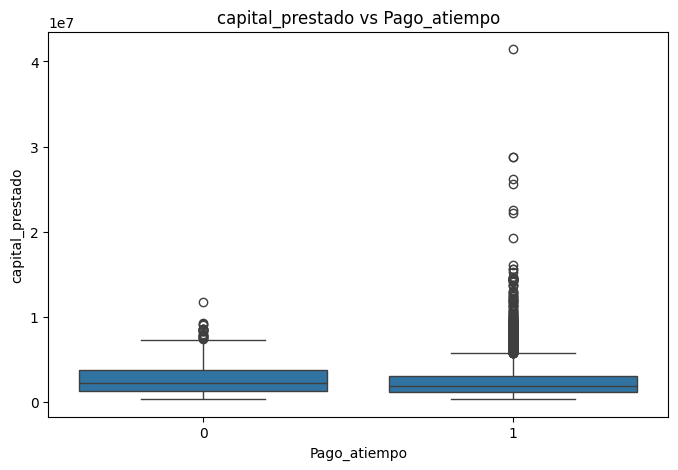

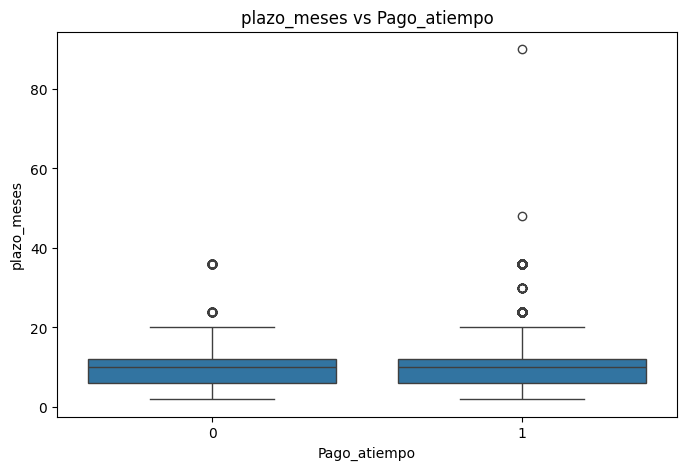

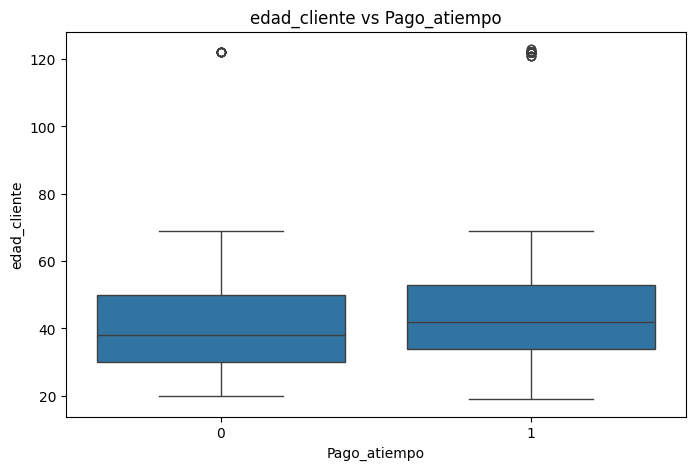

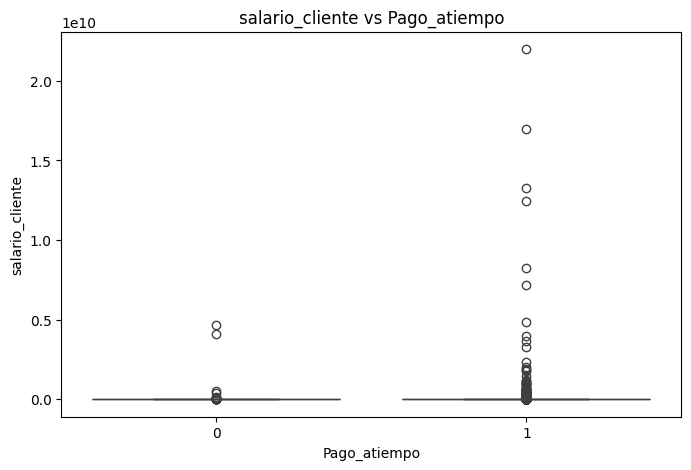

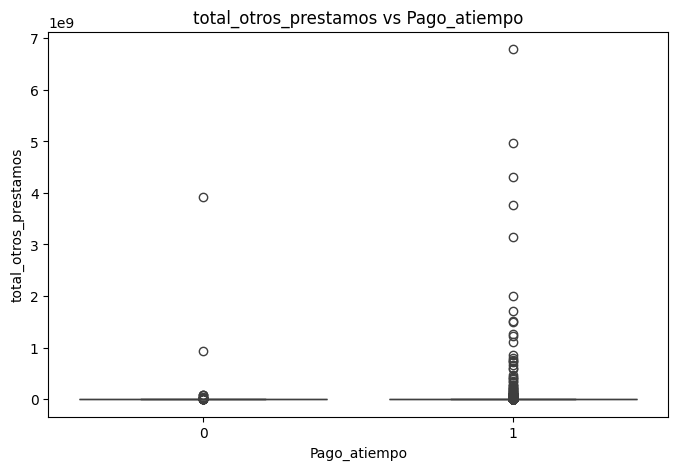

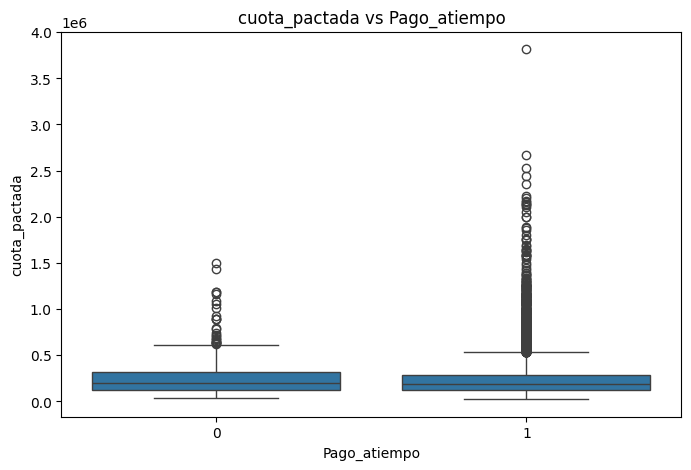

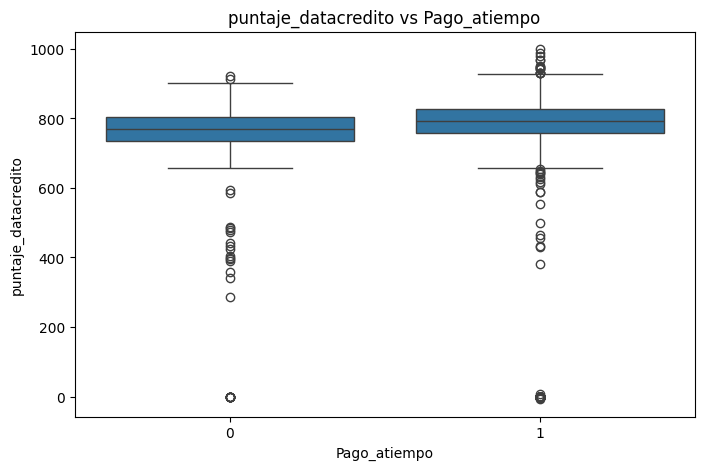

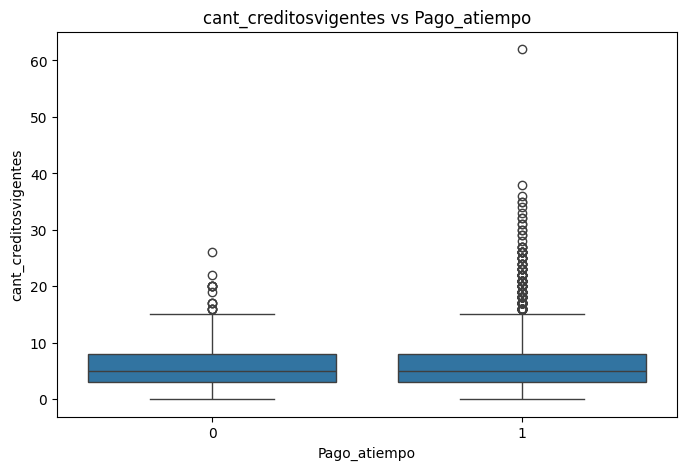

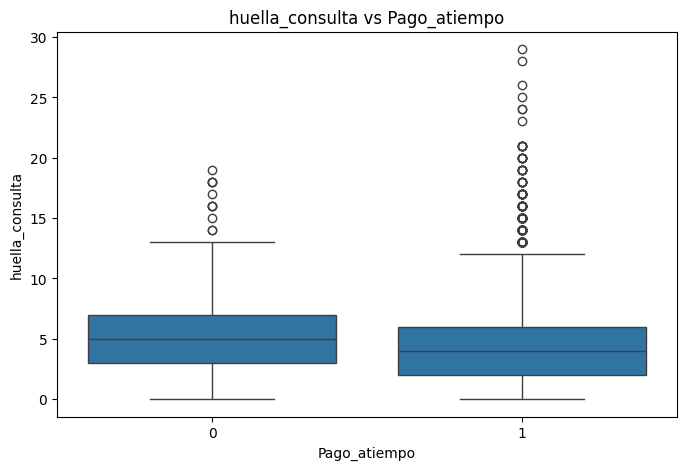

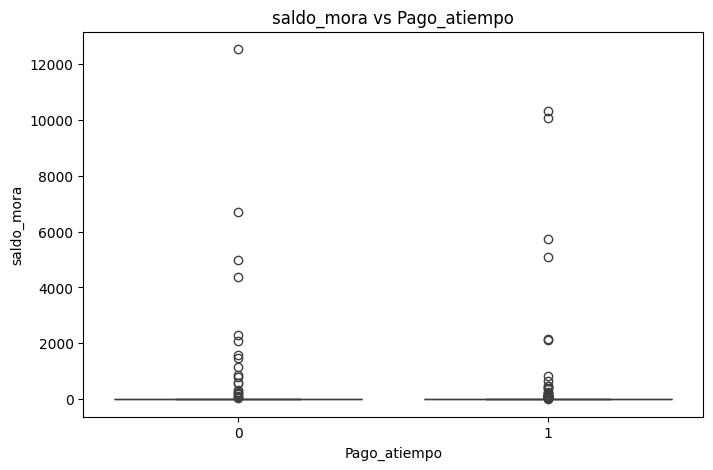

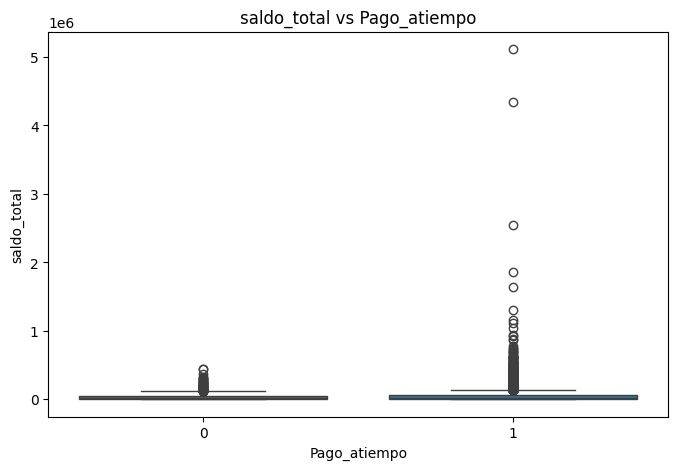

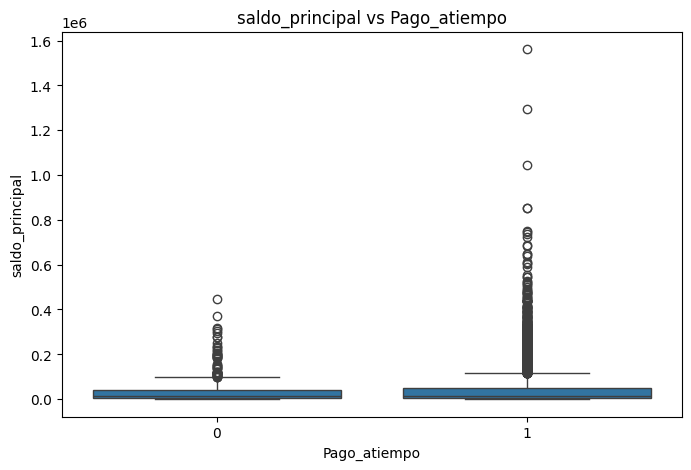

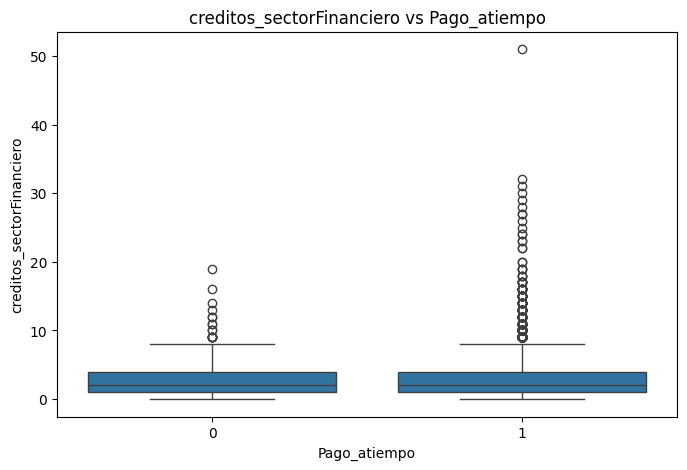

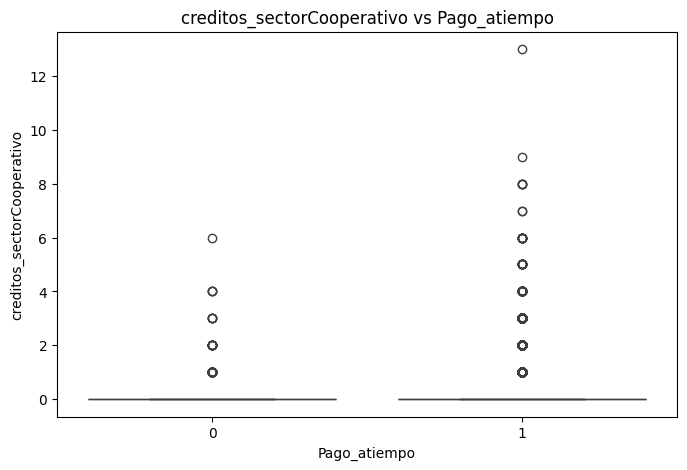

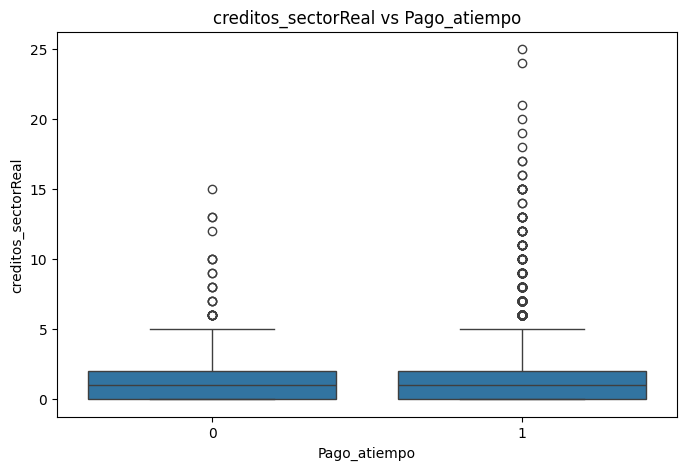

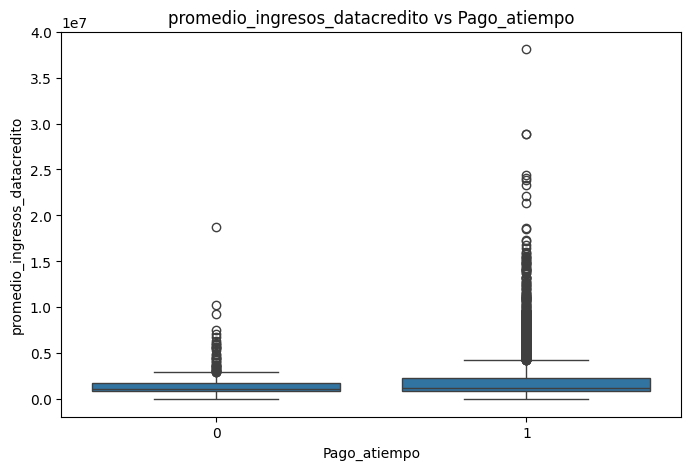

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = df_creditos.select_dtypes(include=["int64", "float64", "Int64"]).columns
numericas = [col for col in numericas if col != "Pago_atiempo"]  # excluimos target

for col in numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Pago_atiempo", y=col, data=df_creditos)
    plt.title(f"{col} vs Pago_atiempo")
    plt.show()


**Comprensión de características y esquema (bivariable)**

* capital_prestado vs Pago_atiempo:
Tanto los clientes que pagan (1) como los que no pagan (0) muestran distribuciones similares.
Hay outliers de montos muy altos en los que sí pagan, lo que puede indicar que clientes con préstamos grandes tienden a ser más responsables (posiblemente porque son perfiles más seleccionados o con mejores garantías).

El monto del préstamo no diferencia claramente entre buenos y malos pagadores, pero los valores extremos sí tienden a estar en clientes cumplidos.

* plazo_meses vs Pago_atiempo:
Ambas clases (0 y 1) tienen distribuciones muy parecidas.
La mayoría de los plazos se concentran entre 6 y 20 meses, con pocos casos extremos de hasta 80 meses.

El plazo del préstamo no parece influir directamente en el pago a tiempo.

* edad_cliente vs Pago_atiempo:
La mediana de edad es similar para ambos grupos (~40 años).
Hay outliers de clientes con edades poco realistas (>100 años), que deberían revisarse.
No se observan diferencias significativas entre los que pagan y los que no.

La edad no es un predictor fuerte por sí sola, aunque se podría probar generar flags (ej: jóvenes <25 o adultos mayores >65).

* salario_cliente vs Pago_atiempo:
Existen muchos outliers (salarios extremadamente altos).
Los clientes cumplidos (1) parecen concentrar más casos de salarios elevados que los incumplidos.
Sin embargo, la mayoría de clientes (ambos grupos) tienen salarios relativamente bajos.

El salario alto podría estar asociado con mayor probabilidad de pago, aunque hay ruido por outliers.

* total_otros_prestamos vs Pago_atiempo:
Se observan outliers altos en los que pagan a tiempo.
La mayoría de clientes tienen valores bajos en otros préstamos.
La distribución es bastante similar entre cumplidos e incumplidos.

Tener otros préstamos no parece aumentar el incumplimiento directamente (quizás se deba a que quienes tienen más préstamos suelen ser clientes con historial positivo).

* cuota_pactada vs Pago_atiempo:
Las medianas son parecidas entre ambos grupos.
Se nota que los cumplidos (1) tienen más casos de cuotas altas que se pagan.
Los incumplidos (0) también tienen cuotas altas, pero menos.

Cuotas muy altas son riesgo en general, pero quienes tienen perfil sólido tienden a pagarlas.

* puntaje_datacredito vs Pago_atiempo:
Aquí sí hay una diferencia clara:
Los cumplidos (1) tienen un puntaje mayor en promedio.
Los incumplidos (0) concentran más casos en puntajes bajos.

El puntaje de datacrédito es un predictor fuerte del pago.

* cant_creditosvigentes vs Pago_atiempo:
La mayoría de clientes tienen pocos créditos vigentes (0–10).
Quienes tienen más créditos vigentes tienden a estar en el grupo que sí paga (1).
Pocos incumplidos tienen muchos créditos vigentes.

Tener varios créditos activos no necesariamente es malo ya que podría reflejar confianza del sistema financiero en el cliente.

* huella_consulta vs Pago_atiempo:
Distribución similar entre cumplidos (1) e incumplidos (0).
La mediana está alrededor de 4–5 consultas.
Hay outliers importantes (≥20 consultas) en ambos grupos, un poco más en los cumplidos.

Por sí sola no discrimina bien, pero un flag de “alta huella de consulta” podría ser predictor de riesgo.

* saldo_mora vs Pago_atiempo:
La mayoría tiene saldo_mora = 0.
Algunos incumplidos (0) tienen saldos en mora.
Los cumplidos también pueden tener valores pequeños de mora, pero menos frecuentes.

Variable muy dispersa y sesgada → mejor crear un atributo binario “en_mora” (sí/no). Si se realiza este cambio hay que crear antes la variable derivada ingresos.

* saldo_total vs Pago_atiempo:
Distribución muy sesgada; la mayoría cerca de 0, pero con outliers gigantes .
Tanto cumplidos como incumplidos presentan altos saldos, aunque los cumplidos concentran más en los extremos.

Útil trabajar escalado.

* saldo_principal vs Pago_atiempo:
Similar al caso anterior, mayoría bajos, algunos extremos.
El comportamiento es parecido en ambos grupos.

* creditos_sectorFinanciero vs Pago_atiempo:
Mayoría de clientes tiene 0–5 créditos financieros.
Hay outliers (hasta 50 créditos), sobre todo en los cumplidos.

Podría indicar confianza del sistema en esos clientes.

* creditos_sectorCooperativo vs Pago_atiempo:
Casi todos tienen 0–1; pocos casos extremos (~12).
No hay diferencia clara entre cumplidos e incumplidos.

* creditos_sectorReal vs Pago_atiempo:
Valores bajos predominan (0–3), con outliers hasta 24.
Distribución similar entre ambos grupos.

Igual que el anterior, más valioso en combinación.

* promedio_ingresos_datacredito vs Pago_atiempo
Cumplidos tienden a mostrar mayores ingresos promedio.

Buena señal para riesgo. posible normalización y generar relaciones: cuota/ingresos, saldo_total/ingresos, etc.





**3.3 Análisis multivariable**

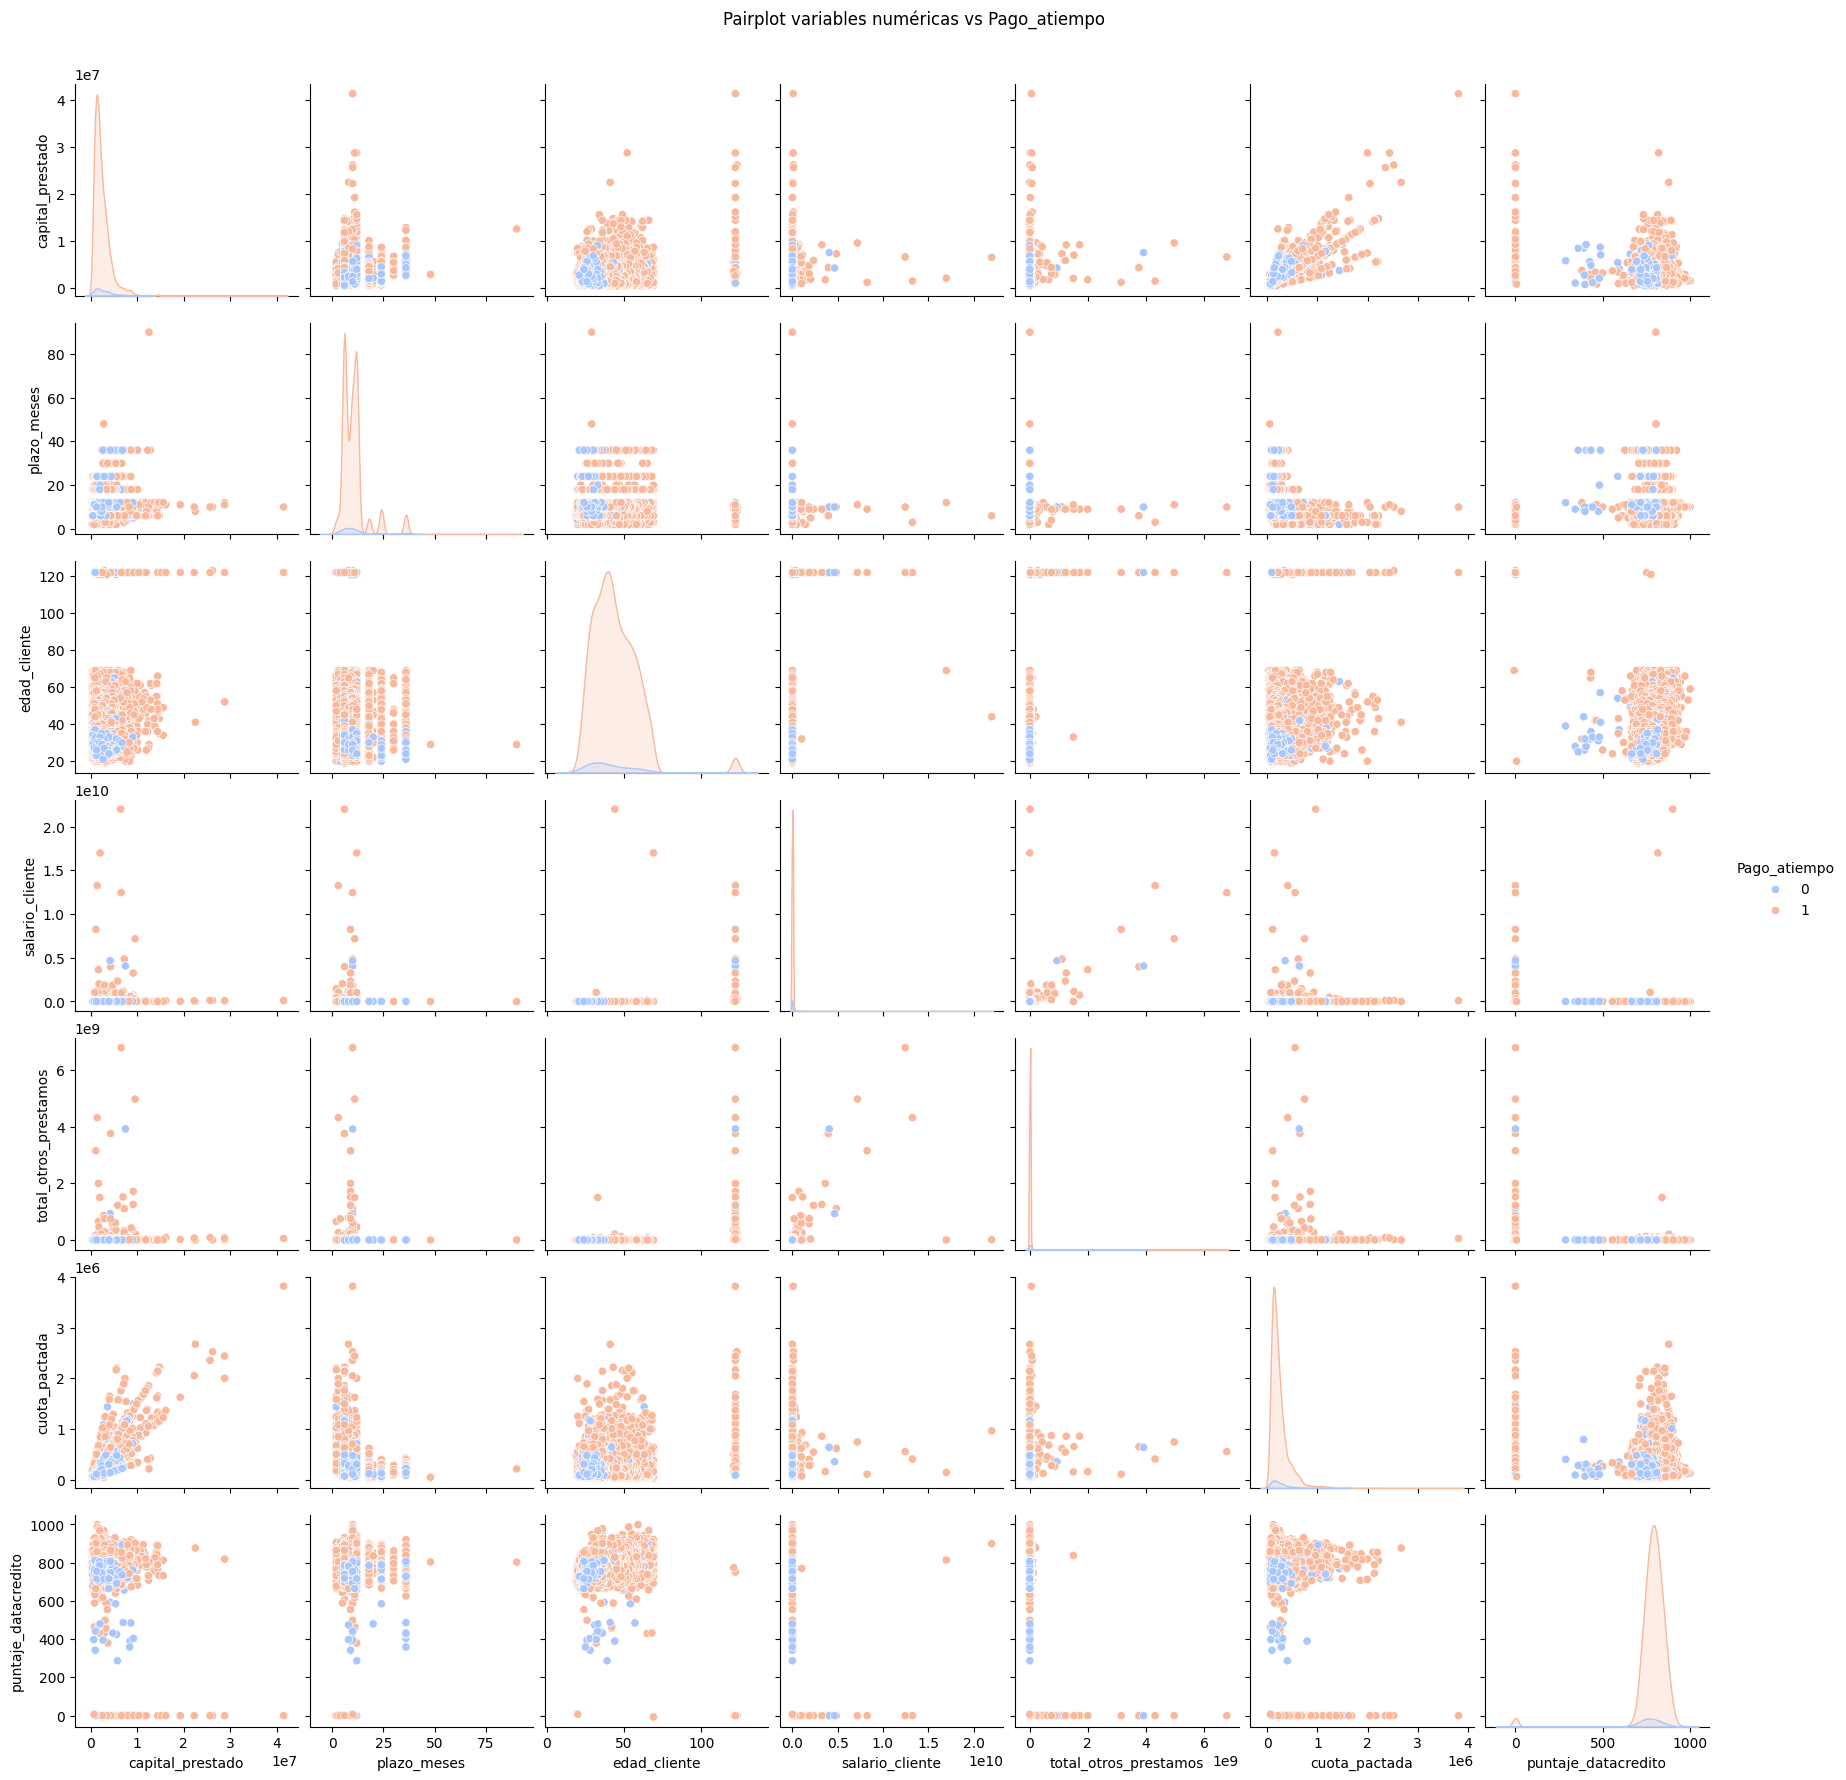

Tabla cruzada: tipo_laboral vs Pago_atiempo
Pago_atiempo          0         1
tipo_laboral                     
Empleado       0.042938  0.957062
Independiente  0.055126  0.944874

Tabla cruzada: tendencia_ing vs Pago_atiempo
Pago_atiempo               0         1
tendencia_ingresos                    
-702927             0.000000  1.000000
-566272             0.000000  1.000000
-435177             0.000000  1.000000
-224714             0.000000  1.000000
-164315             0.000000  1.000000
-101368             0.000000  1.000000
-70715              0.000000  1.000000
-28589              0.000000  1.000000
-4105               0.000000  1.000000
-288                0.000000  1.000000
0                   0.000000  1.000000
3978                0.000000  1.000000
5697                0.000000  1.000000
8315                0.000000  1.000000
9090                0.000000  1.000000
9147                0.000000  1.000000
10808               0.000000  1.000000
15090               0.000000  1.0

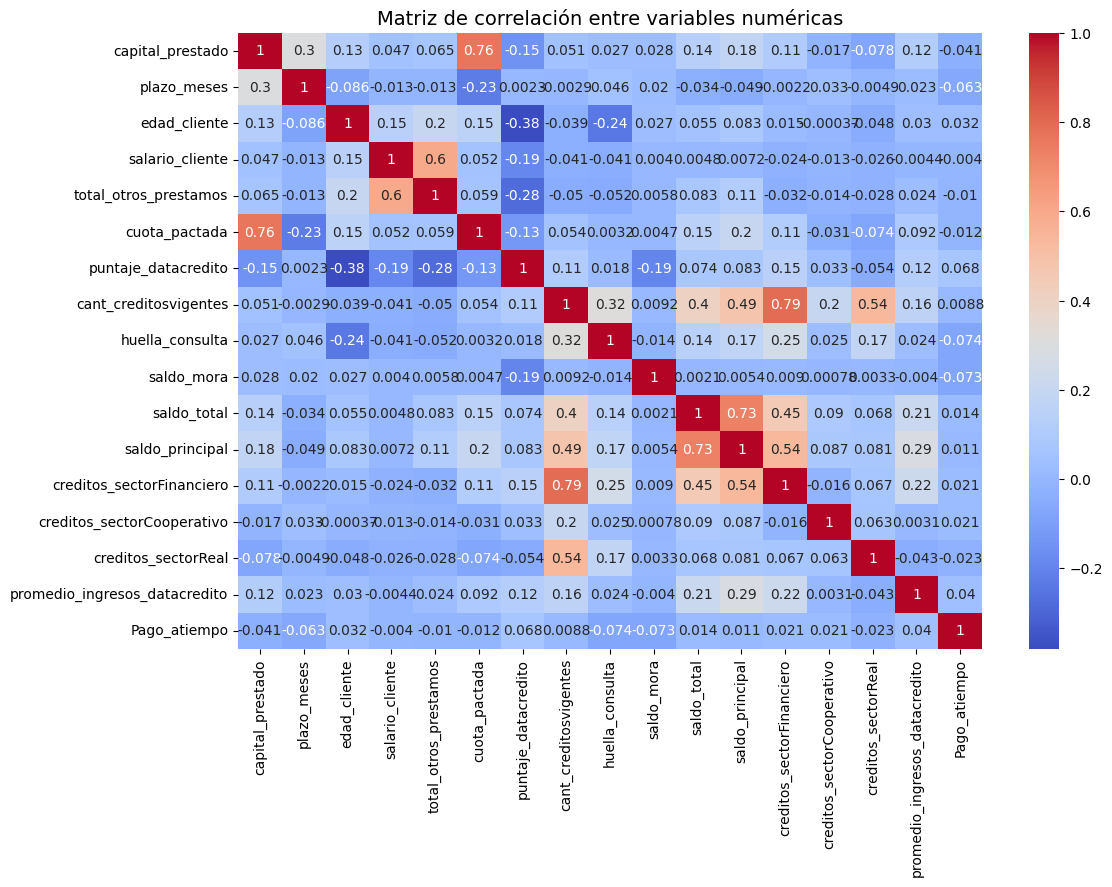

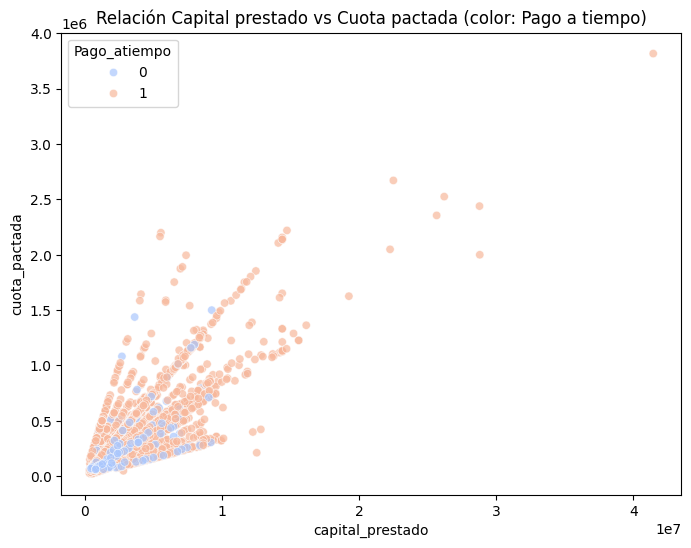

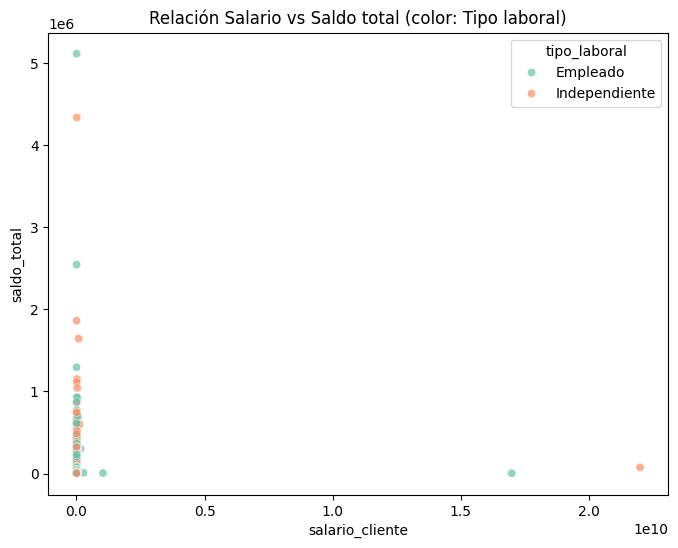

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.pairplot(
    df_creditos[["capital_prestado", "plazo_meses", "edad_cliente", "salario_cliente",
                 "total_otros_prestamos", "cuota_pactada", "puntaje_datacredito", "Pago_atiempo"]],
    hue="Pago_atiempo", diag_kind="kde", palette="coolwarm"
)
plt.suptitle("Pairplot variables numéricas vs Pago_atiempo", y=1.02)
plt.show()

# ==========================
# 2. Tabla cruzada entre variables categóricas y la variable objetivo
# ==========================
tabla_tipo_laboral = pd.crosstab(df_creditos["tipo_laboral"], df_creditos["Pago_atiempo"], normalize="index")
print("Tabla cruzada: tipo_laboral vs Pago_atiempo")
print(tabla_tipo_laboral)

tabla_tendencia_ing = pd.crosstab(df_creditos["tendencia_ingresos"], df_creditos["Pago_atiempo"], normalize="index")
print("\nTabla cruzada: tendencia_ing vs Pago_atiempo")
print(tabla_tendencia_ing)

# ==========================
# 3. Matriz de correlación (numéricas)
# ==========================
corr = df_creditos.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.show()

# ==========================
# 4. Gráficos de dispersión con hue
# ==========================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_creditos,
    x="capital_prestado",
    y="cuota_pactada",
    hue="Pago_atiempo",
    alpha=0.7,
    palette="coolwarm"
)
plt.title("Relación Capital prestado vs Cuota pactada (color: Pago a tiempo)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_creditos,
    x="salario_cliente",
    y="saldo_total",
    hue="tipo_laboral",
    alpha=0.7,
    palette="Set2"
)
plt.title("Relación Salario vs Saldo total (color: Tipo laboral)")
plt.show()


**Conclusiones generales del multivariable**

El puntaje crediticio es la variable más discriminante: quienes tienen puntajes altos pagan a tiempo con mucha mayor probabilidad.

Ingresos vs cuota pactada es un factor crítico: incumplen más quienes tienen cuotas altas respecto a su salario.

Capital prestado y otros préstamos aumentan el riesgo de incumplimiento cuando son altos.

Plazo largo también puede incrementar el riesgo, aunque en menor medida.

Edad parece tener un efecto menor comparado con las demás variables, pero los extremos (jóvenes sin historial o adultos mayores) muestran más incumplimientos.

# 4.Feature Engineering

**4.1 Limpieza de datos.**

In [64]:
df_creditos.isnull().sum().sort_values(ascending=False)


,0
tendencia_ingresos,2932
promedio_ingresos_datacredito,2930
saldo_principal,405
saldo_mora,156
saldo_total,156
puntaje_datacredito,6
edad_cliente,0
capital_prestado,0
fecha_prestamo,0
tipo_credito,0


In [65]:
print("Filas con >= 3 nulos:", (df_creditos.isnull().sum(axis=1) >= 3).sum())


Filas con >= 3 nulos: 248


In [66]:
# Eliminar filas que contienen 3 o más valores nulos
df_creditos = df_creditos[df_creditos.isnull().sum(axis=1) < 3]


Las filas con muchos valores nulos tienen información incompleta. Si faltan tres o más columnas, la fila pierde contexto y puede generar ruido o errores en el análisis o modelado.

In [67]:
df_creditos.isnull().sum().sort_values(ascending=False)

,0
tendencia_ingresos,2685
promedio_ingresos_datacredito,2684
saldo_principal,157
fecha_prestamo,0
tipo_credito,0
edad_cliente,0
plazo_meses,0
capital_prestado,0
tipo_laboral,0
puntaje_datacredito,0


Gracias a esta eliminacion ya no hay filas altamente incompletas

In [68]:
df_creditos.describe()

,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10515,1.051500e+04,10515.0,10515.0,1.051500e+04,10515.0,1.051500e+04,10515.000000,10515.0,10515.0,10515.000000,1.051500e+04,1.035800e+04,10515.0,10515.0,10515.0,7.831000e+03,10515.000000
mean,2025-04-16 09:05:02.960817920,2.391705e+06,10.608179,42.814075,7.773139e+06,1691407.793153,2.390307e+05,791.525630,5.861816,4.310033,7.813790,4.633933e+04,4.034617e+04,2.845554,0.276177,1.333428,2.002826e+06,0.953210
min,2024-11-26 09:17:04,3.600000e+05,2.0,19.0,0.000000e+00,0.0,2.394400e+04,7.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000
25%,2025-01-20 13:05:17,1.224000e+06,6.0,33.0,2.000000e+06,500000.0,1.208580e+05,758.000000,3.0,2.0,0.000000,3.079500e+03,2.690000e+03,1.0,0.0,0.0,9.251570e+05,1.000000
50%,2025-03-27 08:44:59,1.908000e+06,10.0,41.0,3.000000e+06,1000000.0,1.817020e+05,791.000000,5.0,4.0,0.000000,1.655600e+04,1.444250e+04,2.0,0.0,1.0,1.204496e+06,1.000000
75%,2025-06-15 16:20:08,3.048854e+06,12.0,52.0,4.700000e+06,2000000.0,2.833290e+05,826.000000,8.0,6.0,0.000000,5.349900e+04,4.763225e+04,4.0,0.0,2.0,2.230544e+06,1.000000
max,2026-04-26 18:43:52,2.880000e+07,90.0,121.0,2.200000e+10,1500000000.0,2.671342e+06,999.000000,62.0,29.0,12534.000000,5.116066e+06,1.562285e+06,51.0,13.0,25.0,3.810658e+07,1.000000
std,NaN,1.769617e+06,6.680767,11.958505,2.712447e+08,15037306.977922,1.981602e+05,51.573576,3.92417,3.046518,226.940378,1.066464e+05,7.124244e+04,2.747285,0.723658,1.834689,2.133232e+06,0.211199


In [69]:
df_creditos[df_creditos['plazo_meses'] == 90]

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje_datacredito,...,huella_consulta,saldo_mora,saldo_total,saldo_principal,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
8029,7,2025-03-15 14:37:25,12542263.2,90,29,Empleado,0,1500000,212394,803.0,...,4,0.0,19888.0,19888.0,4,0,0,NaN,NaN,1


In [70]:
df_creditos = df_creditos[df_creditos['plazo_meses'] != 90]

Se elimina la fila con plazo_meses = 90 porque es un outlier extremo y además presenta datos críticos anómalos: el salario del cliente es 0 y originalmente se desconocía tanto su promedio como su tendencia de ingresos, lo que hace que esta fila tenga baja calidad y pueda distorsionar cualquier análisis o modelo.

In [71]:
df_creditos.edad_cliente.value_counts()

,count
edad_cliente,
40,346
37,341
38,338
42,330
41,330
43,323
39,319
36,316
31,298


In [72]:
df_creditos = df_creditos[df_creditos['edad_cliente'] != 121]

In [73]:
df_creditos.edad_cliente.value_counts()

,count
edad_cliente,
40,346
37,341
38,338
41,330
42,330
43,323
39,319
36,316
31,298


Se hace eliminación de la fila con el dato 121 en edad de cliente ya que es una edad imposible

In [74]:

filas_problema = df_creditos[
    ((df_creditos['salario_cliente'] == 0) & (df_creditos['promedio_ingresos_datacredito'] == 0)) |
    ((df_creditos['salario_cliente'] == 0) & (df_creditos['promedio_ingresos_datacredito'].isna()))
]

# Mostrar las filas problemáticas
print(filas_problema)

     tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
392             9 2025-01-16 10:47:36         3424414.8           10   
3440            4 2025-10-03 15:15:58         2416800.0            6   
3636            9 2024-12-12 17:12:54         2332394.4           10   
6842            9 2025-11-29 16:30:55         1460986.8            9   
7191            9 2026-01-01 18:33:41         5219283.6           10   

      edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
392             38  Independiente                0                      0   
3440            59  Independiente                0                      0   
3636            47       Empleado                0                      0   
6842            66  Independiente                0                      0   
7191            22       Empleado                0                      0   

      cuota_pactada  puntaje_datacredito  ...  huella_consulta  saldo_mora  \
392          290443       

In [75]:
# Eliminar del DataFrame las filas que cumplen esas condiciones

df_creditos = df_creditos[~(
    ((df_creditos['salario_cliente'] == 0) & (df_creditos['promedio_ingresos_datacredito'] == 0)) |
    ((df_creditos['salario_cliente'] == 0) & (df_creditos['promedio_ingresos_datacredito'].isna()))
)]



Se eliminaron las observaciones en las que tanto salario_cliente como promedio_ingresos_datacredito tomaban el valor de 0 o cuando salario_cliente era 0 y promedio_ingresos_datacredito estaba en nulo, ya que estas condiciones indican ausencia total de información sobre los ingresos del cliente.
Mantener dichas filas hubiera introducido un fuerte sesgo en el análisis, pues no es posible determinar la capacidad de pago ni estimar comportamientos crediticios sin alguna medida de ingresos. En otras palabras, estos registros no aportan valor predictivo y, por el contrario, pueden afectar la calidad y la estabilidad del modelo.

In [76]:
df_creditos.describe()

,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10508,1.050800e+04,10508.0,10508.0,1.050800e+04,10508.0,1.050800e+04,10508.000000,10508.0,10508.0,10508.000000,1.050800e+04,1.035100e+04,10508.0,10508.0,10508.0,7.831000e+03,10508.000000
mean,2025-04-16 08:25:54.256090624,2.390461e+06,10.601447,42.806243,7.752513e+06,1690523.500666,2.390115e+05,791.541492,5.862771,4.311762,6.776171,4.634354e+04,4.034639e+04,2.846308,0.276171,1.333555,2.002826e+06,0.953179
min,2024-11-26 09:17:04,3.600000e+05,2.0,19.0,0.000000e+00,0.0,2.394400e+04,7.000000,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000
25%,2025-01-20 13:13:55,1.223820e+06,6.0,33.0,2.000000e+06,500000.0,1.208242e+05,758.000000,3.0,2.0,0.000000,3.076500e+03,2.688000e+03,1.0,0.0,0.0,9.251570e+05,1.000000
50%,2025-03-27 08:55:17,1.908000e+06,10.0,41.0,3.000000e+06,1000000.0,1.816525e+05,791.000000,5.0,4.0,0.000000,1.654850e+04,1.443500e+04,2.0,0.0,1.0,1.204496e+06,1.000000
75%,2025-06-15 16:11:43,3.048211e+06,12.0,52.0,4.700000e+06,2000000.0,2.833070e+05,826.000000,8.0,6.0,0.000000,5.349500e+04,4.761950e+04,4.0,0.0,2.0,2.230544e+06,1.000000
max,2026-04-26 18:43:52,2.880000e+07,48.0,69.0,2.200000e+10,1500000000.0,2.671342e+06,999.000000,62.0,29.0,12534.000000,5.116066e+06,1.562285e+06,51.0,13.0,25.0,3.810658e+07,1.000000
std,NaN,1.767167e+06,6.637774,11.932304,2.713228e+08,15041251.568136,1.982066e+05,51.573083,3.925039,3.046617,203.380061,1.066759e+05,7.125759e+04,2.747812,0.723674,1.834856,2.133232e+06,0.211266


In [77]:
df_creditos.cant_creditosvigentes.value_counts()

,count
cant_creditosvigentes,
4,1395
5,1261
3,1204
6,1116
2,1047
7,868
8,771
1,635
9,561


In [78]:
df_creditos = df_creditos[df_creditos['cant_creditosvigentes'] != 62]

Se eliminó la fila con el valor de 62 en cant_creditosvigentes por ser un outlier extremo que no representa el comportamiento típico de los clientes y que podía sesgar el análisis.


In [79]:
from datetime import datetime
fecha_actual = pd.to_datetime(datetime.now().date())
print(fecha_actual)

2025-08-22 00:00:00


In [80]:
df_creditos = df_creditos[df_creditos['fecha_prestamo'] <= fecha_actual]

In [81]:
# Imputación final tras eliminar filas con muchos nulos
df_creditos["saldo_principal"].fillna(df_creditos["saldo_principal"].median(), inplace=True)
df_creditos["promedio_ingresos_datacredito"].fillna(df_creditos["promedio_ingresos_datacredito"].median(), inplace=True)

/tmp/ipython-input-688600916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_creditos["saldo_principal"].fillna(df_creditos["saldo_principal"].median(), inplace=True)
/tmp/ipython-input-688600916.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [82]:
# Paso 1: Convertimos todo a string para unificar el formato
df_creditos["tendencia_ingresos"] = df_creditos["tendencia_ingresos"].astype(str)

# Paso 2: Definir los valores válidos esperados
valores_validos = ["Creciente", "Estable", "Decreciente"]

# Paso 3: Reemplazar los valores no válidos (incluidos números o errores) por "Desconocido"
df_creditos.loc[~df_creditos["tendencia_ingresos"].isin(valores_validos), "tendencia_ingresos"] = "Desconocido"

# Paso 4: Convertir a categoría y añadir explícitamente "Desconocido" como categoría
df_creditos["tendencia_ingresos"] = df_creditos["tendencia_ingresos"].astype("category")

Se imputan los valores faltantes restantes en lugar de eliminar más filas, ya que estas variables son relevantes para el análisis, la cantidad de datos faltantes es manejable (categoría 'Desconocido'), lo cual permite conservar la calidad y representatividad del dataset.

Se trato los datos que tenían numeros en la variable tendencia_ingresos como si fueron nulos

In [83]:
df_creditos.isnull().sum().sort_values(ascending=False)

,0
tipo_credito,0
fecha_prestamo,0
capital_prestado,0
plazo_meses,0
edad_cliente,0
tipo_laboral,0
salario_cliente,0
total_otros_prestamos,0
cuota_pactada,0
puntaje_datacredito,0


In [84]:
df_creditos = df_creditos.drop(columns=['plazo_meses'])

Se elimina según el EDA

In [85]:
df_creditos = df_creditos[df_creditos['tipo_credito'] != 68]

El código 68 en tipo de crédito aparece solo una vez, por lo cual se considera un outlier.

In [86]:
#Crear la columna de intereses en todo el dataset
df_creditos["intereses"] = (
    df_creditos["saldo_total"] - df_creditos["saldo_principal"] - df_creditos["saldo_mora"]
)

# Verificar las primeras filas con la nueva variable
print(df_creditos[["saldo_total", "saldo_principal", "saldo_mora", "intereses"]].head())


   saldo_total  saldo_principal  saldo_mora  intereses
0      51258.0          51258.0         0.0        0.0
1       8673.0           8673.0         0.0        0.0
3      15782.0          15782.0         0.0        0.0
4     204804.0         204804.0         0.0        0.0
5      24399.0          24399.0         0.0        0.0


Se agrega esta derivada para comprender mejor la variable saldo_total y tener posiblemente otra variable predictora

In [87]:
df_creditos['antiguedad_cliente'] = ((fecha_actual - df_creditos['fecha_prestamo']).dt.days // 30)

Variable derivada para saber la antiguedad del cliente en meses

In [88]:
df_creditos = df_creditos.drop(columns=['fecha_prestamo'])

Después de agregar la derivada antiguedad_cliente ya no necesito la variable de fecha_prestamo

In [89]:
df_creditos['en_mora'] = df_creditos['saldo_mora'].apply(lambda x: 1 if x > 0 else 0)

1 es Sí y 0 es No

Se crea esta derivada según el EDA, se creó primero intereses ya que se necesitaba hacer uso de saldo_mora antes de eliminarla

In [90]:
df_creditos = df_creditos.drop(columns=['saldo_mora'])

Después de agregar la derivada en_mora ya no necesito la variable de saldo_mora

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


X = df_creditos.drop(columns='Pago_atiempo')
y = df_creditos['Pago_atiempo']


num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Solo para ver cómo quedaría
print("Columnas numéricas a normalizar:", num_cols)

Columnas numéricas a normalizar: ['capital_prestado', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_total', 'saldo_principal', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito', 'intereses', 'antiguedad_cliente', 'en_mora']


In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ajustar y transformar solo las columnas numéricas
df_normalized = X.copy()
df_normalized[num_cols] = scaler.fit_transform(X[num_cols])


In [93]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# 2. Definir columnas por tipo
cat_cols = ['tipo_credito', 'tipo_laboral']
ordinal_col = ['tendencia_ingresos']
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols + ordinal_col).tolist()

# 3. Crear un transformador para tendencia_ingresos (ordinal -> numérico -> escalar)
def map_ordinal(X):
    mapping = {
        'Desconocido': 0,
        'Decreciente': 1,
        'Estable': 2,
        'Creciente': 3
    }
    return X.replace(mapping).astype(int)


ordinal_pipeline = Pipeline([
    ('map', FunctionTransformer(map_ordinal, validate=False)),
    ('scaler', MinMaxScaler())
])

# 4. Pipeline para variables numéricas
numeric_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# 5. Pipeline para variables categóricas nominales
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# 6. ColumnTransformer: aplicar cada transformación a su tipo de columna
preprocessor = ColumnTransformer([
    ('ord', ordinal_pipeline, ordinal_col),
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# 7. Pipeline completo con model
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression())
])

# 8. Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 9. Entrenar pipeline completo
pipeline.fit(X_train, y_train)


/tmp/ipython-input-4232107797.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace(mapping).astype(int)
/tmp/ipython-input-4232107797.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return X.replace(mapping).astype(int)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ord',
                                                  Pipeline(steps=[('map',
                                                                   FunctionTransformer(func=<function map_ordinal at 0x79404bd8d4e0>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tendencia_ingresos']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['antiguedad_cliente',
                                                   'cant_creditosvigentes',
                                                   'capital_prestado',
                                                   'creditos_sectorCooper...
                                                   'cuota_pactada',
                                                   'edad_cliente', 'en_mora',
                                                   'huella_consulta',
                                                   'intereses',
                                                   'promedio_ingresos_datacredito',
                                                   'puntaje_datacredito',
                                                   'salario_cliente',
                                                   'saldo_principal',
                                                   'saldo_total',
                                                   'total_otros_prestamos']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['tipo_credito',
                                                   'tipo_laboral'])])),
                ('model', LogisticRegression())])

In [94]:
# 1. Transformar X_train
X_train_transformed = pipeline.named_steps['preprocessing'].transform(X_train)

# 2. Reconstruir nombres de columnas
cat_cols = ['tipo_credito', 'tipo_laboral']
ordinal_col = ['tendencia_ingresos']
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols + ordinal_col).tolist()

# One-hot column names
onehot = pipeline.named_steps['preprocessing'].named_transformers_['cat'].named_steps['onehot']
onehot_names = onehot.get_feature_names_out(cat_cols)

# Todas las columnas en orden
final_columns = ordinal_col + num_cols + list(onehot_names)

# 3. Crear DataFrame transformado
import pandas as pd
X_train_df = pd.DataFrame(X_train_transformed, columns=final_columns, index=X_train.index)

# 4. Agregar la variable objetivo
X_train_df['pago_atiempo'] = y_train

/tmp/ipython-input-4232107797.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace(mapping).astype(int)
/tmp/ipython-input-4232107797.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return X.replace(mapping).astype(int)


In [95]:
X_train_df.to_csv('df_modelo_final.csv', index=False)